C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

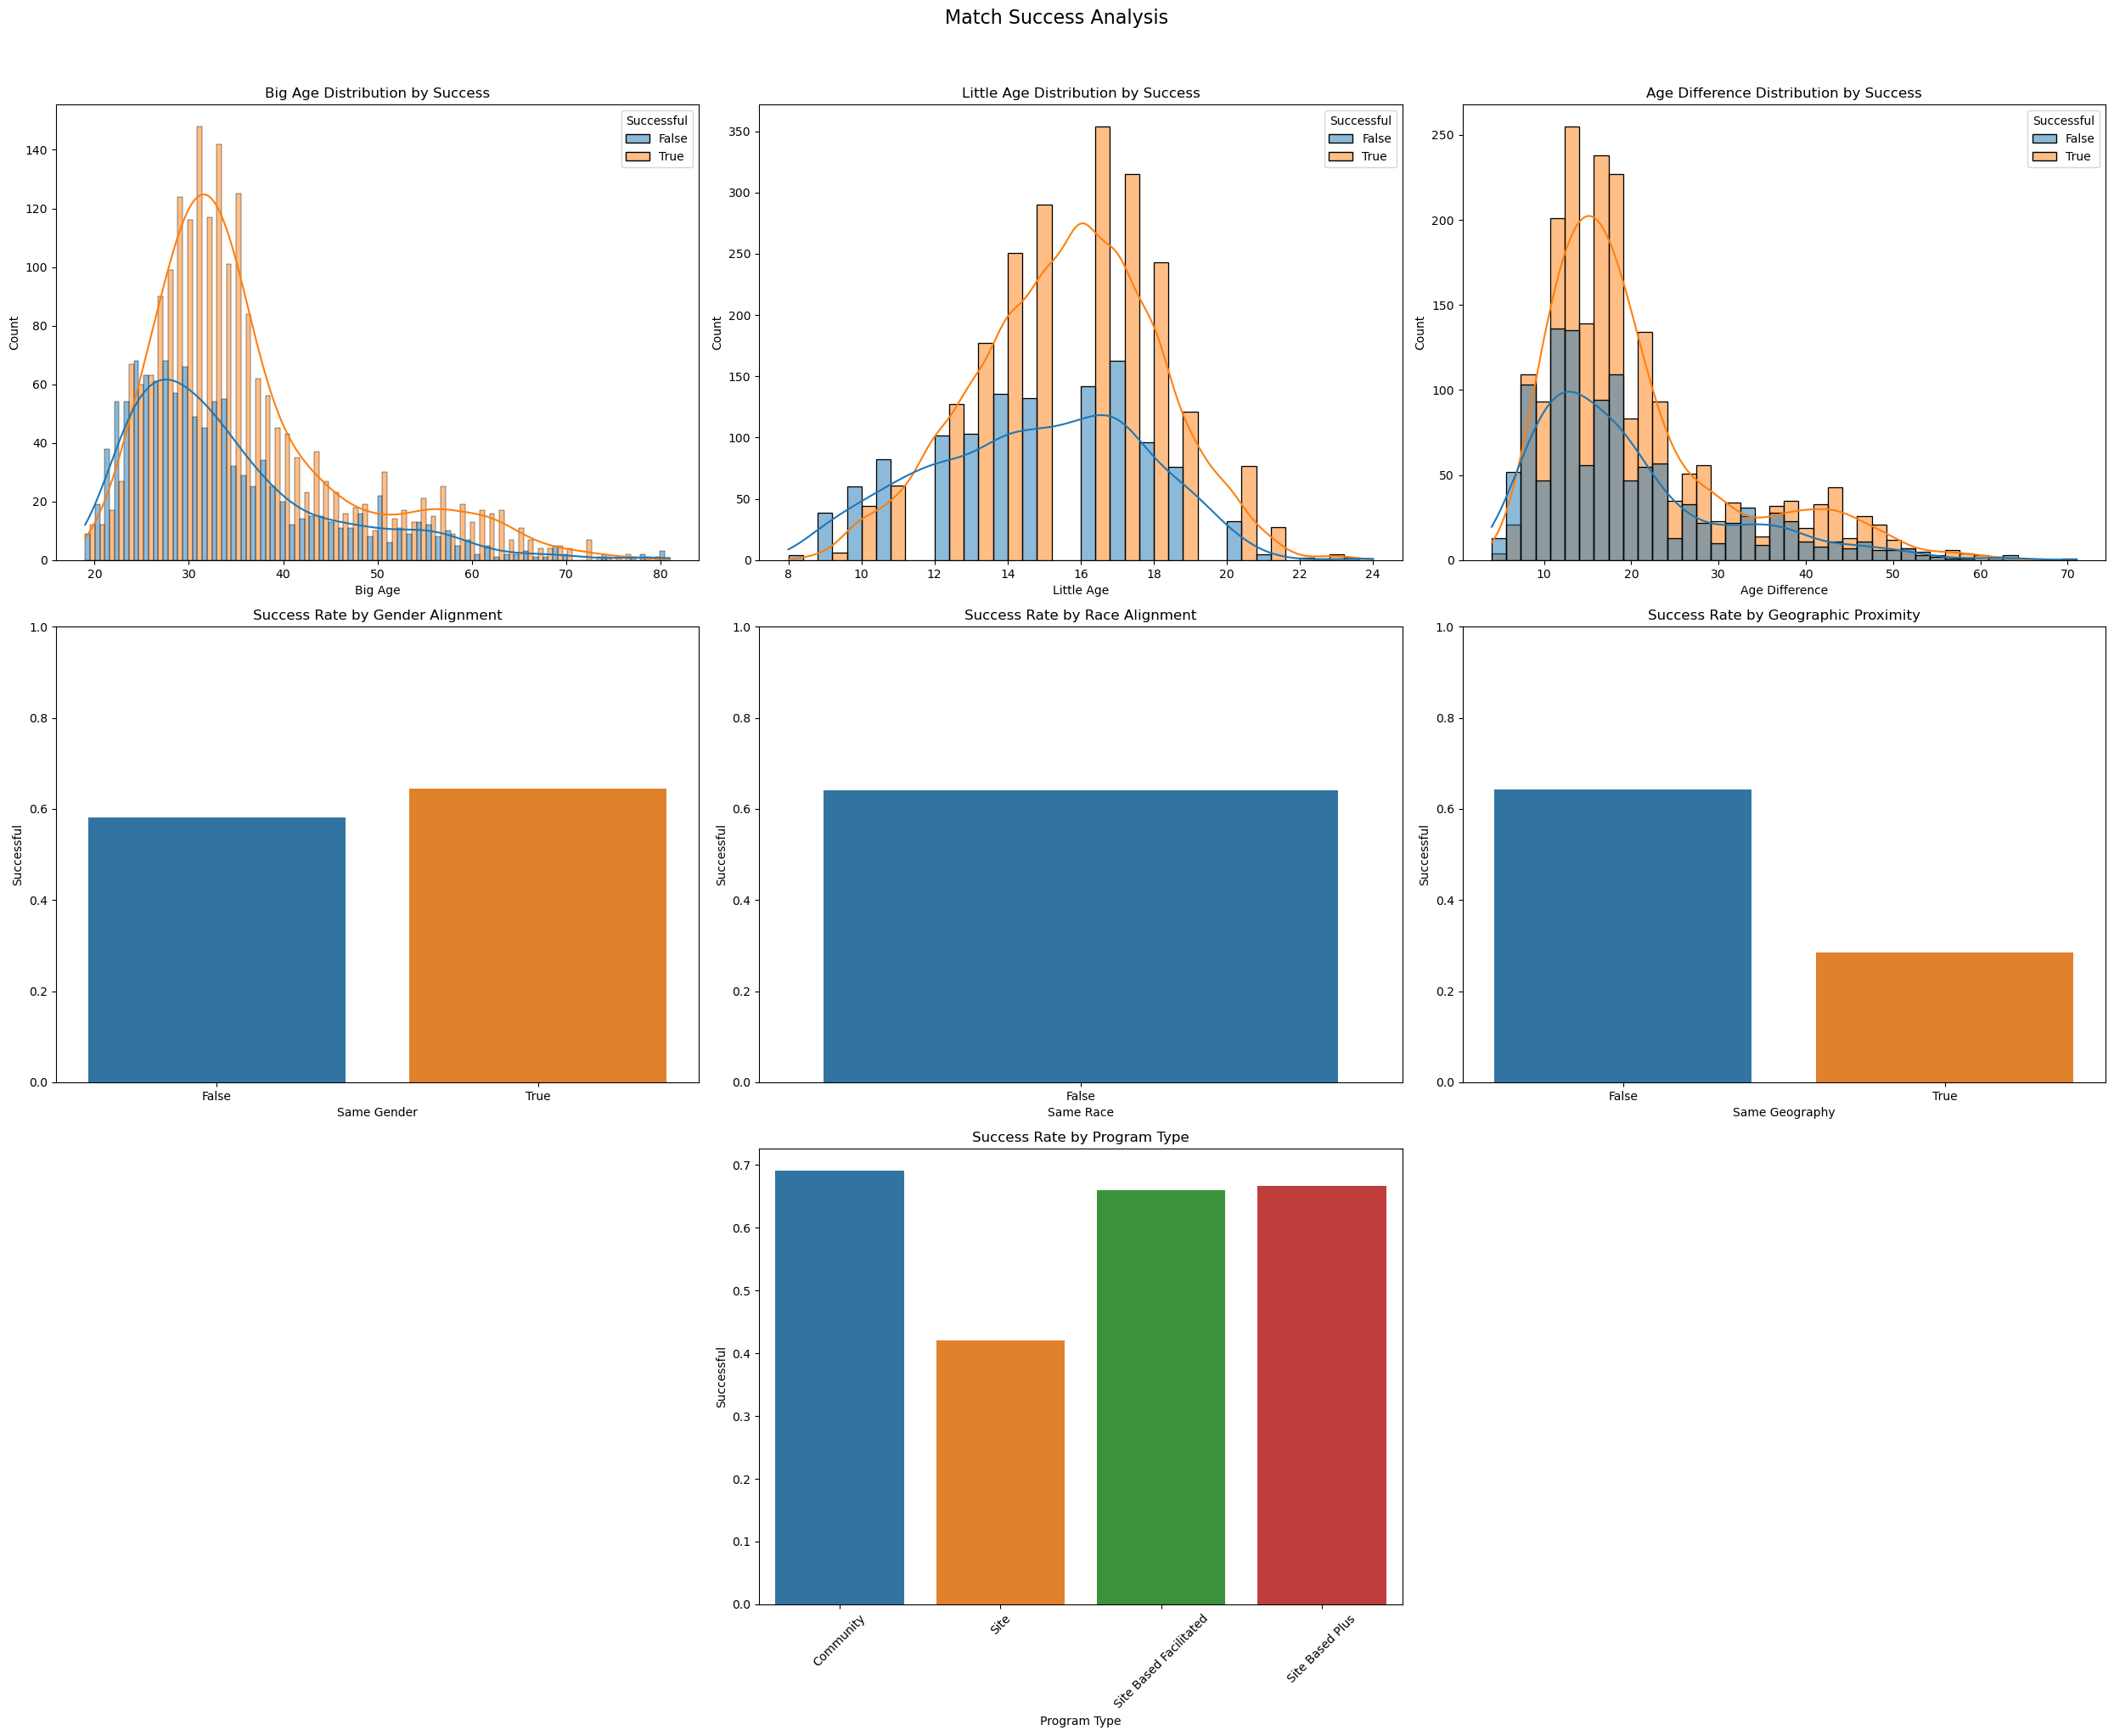

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Assuming your DataFrame is named 'df'
# Convert birthdates to datetime objects
date_cols = ['Big Birthdate', 'Little Birthdate']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

# Calculate ages using birthdates
today = datetime.now()
df['Little Age'] = (today - df['Little Birthdate']).dt.days // 365
df['Big Age'] = (today - df['Big Birthdate']).dt.days // 365
df['Age Difference'] = df['Big Age'] - df['Little Age']

# Create success flag using Match Length column
successful_closure_reasons = ['Child: Graduated', 'Successful Match Closure']
df['Successful'] = (
    (df['Match Length'] > 12) |  # Long-lasting matches (>1 year)
    df['Closure Reason'].isin(successful_closure_reasons)
)

# Create alignment flags
df['Same Gender'] = df['Big Gender'] == df['Little Gender']
df['Same Race'] = df['Big Race/Ethnicity'] == df['Little Participant: Race/Ethnicity']
df['Same Geography'] = df['Big Home Census Block Group'] == df['Little Mailing Address Census Block Group']

# Set up visualization grid
plt.figure(figsize=(25, 20))
plt.suptitle("Match Success Analysis", y=1.02, fontsize=16)

# 1. Big Age Distribution
plt.subplot(3, 3, 1)
sns.histplot(data=df, x='Big Age', hue='Successful', bins=60, kde=True, multiple='dodge')
plt.title('Big Age Distribution by Success')
print ()

# 2. Little Age Distribution
plt.subplot(3, 3, 2)
sns.histplot(data=df, x='Little Age', hue='Successful', bins=20, kde=True, multiple='dodge')
plt.title('Little Age Distribution by Success')

# 3. Age Difference Distribution
plt.subplot(3, 3, 3)
sns.histplot(data=df, x='Age Difference', hue='Successful', bins=40, kde=True)
plt.title('Age Difference Distribution by Success')

# 4. Gender Alignment
plt.subplot(3, 3, 4)
gender_success = df.groupby('Same Gender')['Successful'].mean().reset_index()
sns.barplot(x='Same Gender', y='Successful', data=gender_success)
plt.title('Success Rate by Gender Alignment')
plt.ylim(0, 1)

# 5. Race Alignment
plt.subplot(3, 3, 5)
race_success = df.groupby('Same Race')['Successful'].mean().reset_index()
sns.barplot(x='Same Race', y='Successful', data=race_success)
plt.title('Success Rate by Race Alignment')
plt.ylim(0, 1)

# 6. Geography Alignment
plt.subplot(3, 3, 6)
geo_success = df.groupby('Same Geography')['Successful'].mean().reset_index()
sns.barplot(x='Same Geography', y='Successful', data=geo_success)
plt.title('Success Rate by Geographic Proximity')
plt.ylim(0, 1)


# 8. Program Type Analysis
plt.subplot(3, 3, 8)
program_success = df.groupby('Program Type')['Successful'].mean().reset_index()
sns.barplot(x='Program Type', y='Successful', data=program_success)
plt.xticks(rotation=45)
plt.title('Success Rate by Program Type')

plt.tight_layout()
plt.show()